In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

Three methods of spatial sharpening discussed in the lecture are:
1. Laplacian Sharpening
    
    a. convolution with the Laplacian kernel (2 types) and obtain the edge mask
    
    b . add the edge mask to the original image with appropriate scaling
2. Unsharp Masking
    
    a. blur the image with a Gaussian kernel
    
    b. subtract the blurred image from the original image
    
    c. add the result to the original image with appropriate scaling
3. First order derivative sharpening(Roberts Cross-gradient operator, Sobel operator)

In [2]:
def conv2d(img: np.ndarray, kernel: np.ndarray, stride: int = 0, padding: int = 0) -> np.ndarray:
    temp = np.pad(img, padding, mode='reflect')
    out_img = np.zeros(img.shape)
    for i in range(0, img.shape[0], stride):
        for j in range(0, img.shape[1], stride):
            out_img[i, j] = np.sum(temp[i:i+kernel.shape[0], j:j+kernel.shape[1]] * kernel)
    return out_img

In [3]:
def laplace_filter(img: np.ndarray, type: int = 1) -> np.ndarray:
    if type == 1:
        laplace = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    else:
        laplace = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])
    mask = conv2d(img, laplace, stride=1, padding=1)
    out_img = img - mask
    out_img = out_img.clip(0, 255)
    out_img = out_img.astype(np.uint8)
    return mask, out_img

In [4]:
def unsharp_masking(img: np.ndarray, scale: float = 1.0) -> np.ndarray:
    kernel = np.ones((3, 3)) / 9
    mask = img - conv2d(img, kernel, stride=1, padding=1)
    out_img = img + scale * mask
    out_img = out_img.clip(0, 255)
    out_img = out_img.astype(np.uint8)
    return mask, out_img

In [5]:
def roberts(img: np.ndarray) -> np.ndarray:
    # to faciliate covolution, we use 3*3 kernel instead of 2*2
    roberts_1 = np.array([[0, 0, 0], [0, -1, 0], [0, 0, 1]])
    roberts_2 = np.array([[0, 0, 0], [0, 0, -1], [0, 1, 0]])
    mask_1 = conv2d(img, roberts_1, stride=1, padding=1)
    mask_2 = conv2d(img, roberts_2, stride=1, padding=1)
    mask = np.abs(mask_1) + np.abs(mask_2)
    out_img = img + mask
    out_img = out_img.clip(0, 255)
    out_img = out_img.astype(np.uint8)
    return mask, out_img

In [6]:
def sobel(img: np.ndarray) -> np.ndarray:
    sobel_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    mask_y = conv2d(img, sobel_x, stride=1, padding=1)
    mask_x = conv2d(img, sobel_y, stride=1, padding=1)
    mask = np.abs(mask_x) + np.abs(mask_y)
    out_img = img + mask
    out_img = out_img.clip(0, 255)
    out_img = out_img.astype(np.uint8)
    return mask, out_img

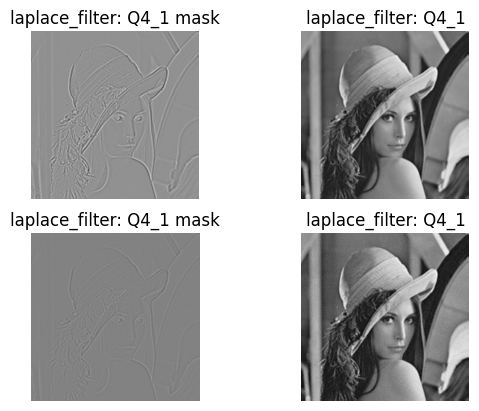

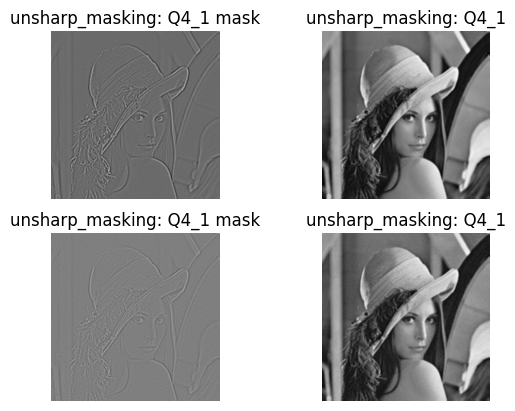

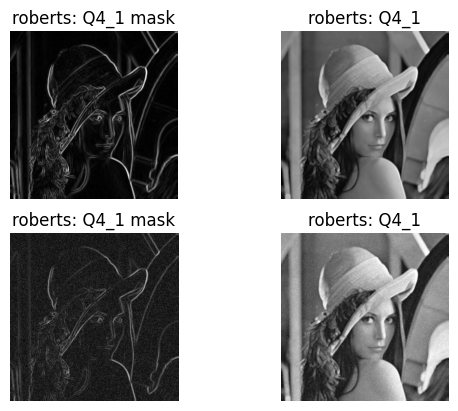

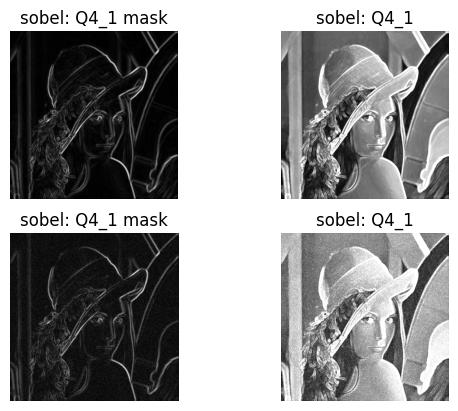

In [7]:
if __name__ == "__main__":
    test1 = plt.imread("in/Q4_1.tif")
    test2 = plt.imread("in/Q4_2.tif")

    func_handle = [laplace_filter, unsharp_masking, roberts, sobel]
    for func in func_handle:
        mask1, out1 = func(test1)
        mask2, out2 = func(test2)
        plt.figure()

        plt.subplot(2,2,1)
        plt.imshow(mask1, cmap='gray')
        plt.title(func.__name__+": Q4_1 mask")
        plt.axis('off')
        plt.subplot(2,2,2)
        plt.imshow(out1, cmap='gray')
        plt.title(func.__name__+": Q4_1")
        plt.axis('off')

        plt.subplot(2,2,3)
        plt.imshow(mask2, cmap='gray')
        plt.title(func.__name__+": Q4_1 mask")
        plt.axis('off')
        plt.subplot(2,2,4)
        plt.imshow(out2, cmap='gray')
        plt.title(func.__name__+": Q4_1")
        plt.axis('off')
        plt.show()
        
        Image.fromarray(out1).save(f"out/{func.__name__}_Q4_1.jpg")
        Image.fromarray(out2).save(f"out/{func.__name__}_Q4_2.jpg")

